In [1]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
from sympy import *
import os
from scipy.integrate import simps
import sys
sys.path.append('../code/')
from snpp import *

The END!


# A.批量运行snpp程序，并生成一个独立文件

In [2]:
delta_lambda=1.755555 # has to be in unit of A
narray=int((10000.0-3500.0)/delta_lambda)  
wavearr=3500.0+delta_lambda*np.float64(np.arange(narray))

In [3]:
mag=[16.,17.,18.,19.]
typ=['SFgal_texp_FeH0_tau5_Ew10_AGN1.fits','SFgal_texp_FeH0_tau1_Ewd.fits','SFgal_texp_FeH0_tau5_Ew5.fits','SFgal_texp_FeH-2_tau10_Ew50.fits']
tim=[300.,600.,900.,1200.,20.,10.,7.,5.]
rn=[2.5,3.,4.,5.5]

In [4]:
noise=np.zeros(4*4*4*4*narray).reshape(4,4,4,4,narray)
mockdata=np.zeros(4*4*4*4*narray).reshape(4,4,4,4,narray)
fl=np.zeros(4*4*4*4*narray).reshape(4,4,4,4,narray)
for x in range(4): #mag
    for y in range(4): #type
        for i in range(4): #time
            for j in range(4): #readnoise
                
                targetmag=mag[x]
                galtpl='../obs/SFgal_tpl/'+typ[y]
                filtera='../obs/filters/sdss_g0.par'

                result=input_mag_model(targetmag, galtpl, filtera)
                wavearr=result[0]   #A
                galflux=result[1]   #10^-12 erg/s/A/cm2

                filename='mg.fits'

                if(os.path.exists(filename))==1:
                    os.remove(filename)

                ss=snpp(wavearr=wavearr,galflux=galflux,
                        filename=filename,
                        readnoise=rn[j],fovp=0.2,npixel_width=2.0,
                        obstime=tim[i],repeatnum=tim[i+4],skyr=22.5,qinput=1.0,
                        skyperpixel=True)

                resu=ss.fits() 
                print([x,y,i,j])
                noise[x,y,i,j,:]=resu[:,3]
                fl[x,y,i,j,:]=resu[:,2]
                mockdata[x,y,i,j,:]=resu[:,9]

./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 0, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 0, 0, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 0, 0, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 300.0

output filt: mg.fits
[0, 1, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 1, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 2, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 2, 0, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 4.0
npixel_width: 2.0
obst

output filt: mg.fits
[0, 3, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 3, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 16.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[0, 3, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 300.0
repeatnum: 20.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 0, 0, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 3.0
npix

output filt: mg.fits
[1, 1, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 1, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 1, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 1, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 2.5
npixel_width: 2.0
obst

output filt: mg.fits
[1, 3, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 3, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 3, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[1, 3, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
readnoise: 2.5
npixel_

output filt: mg.fits
[2, 1, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 1, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 1, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 1, 3, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits
readnoise: 2.5
npixel_width: 2.0
obst

output filt: mg.fits
[2, 3, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 3, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 3, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[2, 3, 3, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 18.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_wid

output filt: mg.fits
[3, 1, 2, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 1, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 1, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 3.0
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 1, 3, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau1_Ewd.fits
readnoise: 4.0
npixel_width: 2.0
obsti

output filt: mg.fits
[3, 3, 2, 1]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 4.0
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 3, 2, 2]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 5.5
npixel_width: 2.0
obstime: 900.0
repeatnum: 7.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 3, 2, 3]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 2.5
npixel_width: 2.0
obstime: 1200.0
repeatnum: 5.0
skyv: 22.5
qinput: 1.0
fov2: 0.04000000000000001
output filt: mg.fits
[3, 3, 3, 0]
./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 19.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH-2_tau10_Ew50.fits
readnoise: 3.0
npixel_width

In [5]:
hdr=fits.Header()
hdr['D01']=('[16,17,18,19]', 'data in dimension 1 in unit of magnitude/arcsec^2')
#hdr['P01']='magnitude', 'parameter in dimension 1'
hdr['D02']=('[AGN, elliptical , weak emission , strong emission]', 'data in dimension 2')
hdr['P02']=('type of spectrum', 'parameter in dimension 2')
hdr['D03']=('[300s*20, 600s*10, 900s*7, 1200s*5]','data in dimension 3')
hdr['P03']=('exposure time (s)*repeat time', 'parameter in dimension 3')
hdr['D04']=('[2.5, 3, 4, 5.5]', 'data in dimension 4')
hdr['P04']=('readnoise (e/pixel)','parameter in dimension 4')
hdr['wave']='Angstrom'
hdr['mockgal']='1e-13 erg/s/cm2/A'

In [6]:
hun1=fits.PrimaryHDU(header=hdr)
hun2=fits.ImageHDU(wavearr,name='wave')
hun3=fits.ImageHDU(noise,name='tot_noise')
hun4=fits.ImageHDU(mockdata,name='mockgal')
hun5=fits.ImageHDU(fl)
hdulist = fits.HDUList([hun1,hun2,hun3,hun4,hun5])
hdulist.writeto('simulatio.fits')

In [7]:
hun1=fits.PrimaryHDU(header=hdr)
hun2=fits.ImageHDU(wavearr,name='wave')
hun3=fits.ImageHDU(noise,name='tot_noise')
hun4=fits.ImageHDU(mockdata,name='mockgal')
#hun5=fits.ImageHDU(fl)
hdulist = fits.HDUList([hun1,hun2,hun3,hun4])
hdulist.writeto('simulation.fits')

In [8]:
su=fits.open('simulation.fits')

In [9]:
su.info()

Filename: simulation.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  WAVE          1 ImageHDU         7   (3702,)   float64   
  2  TOT_NOISE     1 ImageHDU        11   (3702, 4, 4, 4, 4)   float64   
  3  MOCKGAL       1 ImageHDU        11   (3702, 4, 4, 4, 4)   float64   


# B. snpp文件的jupyter版本，分步骤运行每一模块程序
## 1.读取不同波段透光率

In [10]:
################################################################################
def filteraa(filtera):
    #load the filters          
    filtersel=filtera #'../sdss_g0.par'            
    filterpath='./'
    filterfile=filterpath+filtersel   # ;fluxfilter: max=1, min=0, no particular unit
    print(filterfile)   

    ia=0
    with open(filterfile,'r') as fh:
        for line in fh:
            if line.startswith('#'):
                ia=ia+1
                continue

    band=pd.read_csv(filterfile,sep='\s+',header=None,skiprows=ia)
    wavefilter=np.array(band[0])
    fluxfilter=np.array(band[1])
    wavefilter=wavefilter  # A
    vmin=wavefilter[0]
    vmax=wavefilter[-1]

    # find the central wavelength, effective wavelength, and FWHM of the given filter
    filtermid=(vmax-vmin)*0.5  #A, central wavelength
    dwave=wavefilter[1:]-wavefilter[:-1]
    filtereff=np.nansum(dwave*wavefilter[1:]*fluxfilter[1:])/np.nansum(dwave*fluxfilter[1:]) #A, effective wavelength
    rmax=np.max(fluxfilter)
    nnn=np.where(fluxfilter > 0.5*rmax)[0]
    FWHMmin=wavefilter[nnn[0]]
    FWHMmax=wavefilter[nnn[-1]]
    filterwid=FWHMmax-FWHMmin  #A, FWHM

    return wavefilter,fluxfilter,vmin,vmax,filtereff,FWHMmin,FWHMmax


## 2.采用我们提供的模板，生成适应CSST-IFU波长流量

In [11]:
#select input parameters
def input_mag_model(targetmag,galtpl,filtera):

    #filter
    resulte=filteraa(filtera)
    wavefilter=resulte[0]
    fluxfilter=resulte[1]
    vmin=resulte[2]
    vmax=resulte[3]
    filtereff=resulte[4]

    ####################################################################################
    # define wavelength array,
    #cover the range of 350nm to 1050nm, depend on the spectral resolution wanted. 

    delta_lambda=1.755555 # has to be in unit of A
    print('delta_lambda:', delta_lambda)

    narray=int((10000.0-3500.0)/delta_lambda) 
    wavearr=3500.0+delta_lambda*np.float64(np.arange(narray))
    # select out the array of V band filter
    ii=np.logical_and(wavearr >= vmin, wavearr <= vmax)
    wavetmp2=wavearr[ii]
    x=np.interp(wavetmp2,wavefilter,fluxfilter)
    integratef4=x*wavetmp2
    integconst=simps(integratef4,wavetmp2) # int(lambda*Rlambda*dlambda)

    lambdav=filtereff #A
    ###############################################################
    # define basic target brightness, parameters constantly change
    itarget=targetmag    # in Johnson V mag/arcsec^2 unit
    print('itarget:',itarget)

    itarget_jy=3631.0*10**(-itarget/2.5+3.0)  # target flux in V in mJy/arcsec^2 unit
    itarget_nm=itarget_jy*3.0/(lambdav/100.0)**2 #target flux in V in 10^(-12)erg/s/cm^2/A (/arcsec^2 ?)

    galtpl=galtpl
    tplfile=galtpl
    print('tplfile:',tplfile)   

    sfgal=fits.open(tplfile)
    wavegal=sfgal[1].data['wavelength'] # A
    galflux2=sfgal[1].data['flux']
    galflux1=np.interp(wavearr,wavegal,galflux2)

    #;normalize the galaxy spectrum to the V band magnitude specified.
    ii=np.logical_and(wavegal >= vmin, wavegal <= vmax)
    wavetmp=wavegal[ii]
    fluxtmp=galflux2[ii]
    x=np.interp(wavetmp,wavefilter,fluxfilter)
    vfluxtmp=x*wavetmp*fluxtmp #bandpass*lambda*F_gal_lambda
    galintegrate=simps(vfluxtmp,wavetmp)
    galnorm=itarget_nm*integconst/galintegrate
    galflux=galnorm*galflux1   # the unit should now be in 10^(-12)erg/s/A/cm^2 (/arcsec^2 ?)

    return wavearr, galflux


## 3.采用自己提供谱型流量的方式，生成适应CSST-IFU波长流量

In [12]:
# select put in wave and flux
def input_wave_flux(wave,flux):

    wave=wave
    flux=flux
    delta_lambda=1.755555
    narray=int((wave[-1]-wave[0])/delta_lambda) 
    wavearr=wave[0]+delta_lambda*np.float64(np.arange(narray))

    galflux=np.interp(wavearr,wave,flux)      #erg/s/A/cm2

    return wavearr, galflux*10**12


## 4. 输入模板参数，生成波长流量

In [14]:
targetmag=17.
galtpl='../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits'
filtera='../obs/filters/sdss_g0.par'

result=input_mag_model(targetmag,galtpl,filtera)
wavearr=result[0]   #A
galflux=result[1]   #10^-12 erg/s/A/cm2   

'''
filee=fits.open('MockGal-M21Z0.01-W350n1000n.fits')
fluxx=filee[1].data  #erg/s/A/cm2
wavee=filee[2].data    #A

result=input_wave_flux(wavee,fluxx)
wavearr=result[0]  #A
galflux=result[1]  #10^-12 erg/s/A/cm2
'''


./../obs/filters/sdss_g0.par
delta_lambda: 1.755555
itarget: 17.0
tplfile: ../obs/SFgal_tpl/SFgal_texp_FeH0_tau5_Ew5.fits


## 5. 可调节参数

In [15]:
readnoise=5.5
fovp=0.2
npixel_width=2.0
obstime=300
repeatnum=20
skyr=22.5
qinput=1.0, 
skyperpixel=True

## 6.不可调节参数

In [16]:
#some basic unchanged parameters     
d=200        # diameter of the telescope, in cm unit
obscure=0.0  #effective central obscuration, no unit
telarea=3.14159/4.0*d*d*(1.0-obscure)  #effective area of the telescope, cm^2
darkc=0.017   #dark current, in e/s/pix
planckh=6.626    # 10^{-27} erg*s
cc=3.0   # speed of light, 10^{18} A/s
slitunit=0.074  # arcsec. the length of slit which conresponds to a pixel length on IFU CCD 

rn=readnoise  #read noise, in e/pix
print('readnoise:', rn)

npixw=npixel_width
print('npixel_width:',npixw)

obst=obstime  # in seconds, single integration time
print('obstime:',obst)

repn=repeatnum   # repeating time
print('repeatnum:',repn)

iskyr0=skyr  # in Johnson V mag/arcsec^2 unit
print('skyv:', iskyr0)

sampling=2.0
#print('specsample:',sampling)

delta_lambda=1.755555


readnoise: 5.5
npixel_width: 2.0
obstime: 300
repeatnum: 20
skyv: 22.5


## 7. 其他参数

In [17]:
# some less basic parameters, may change, but not often

throughput=pd.read_csv('../obs/IFU_throughput.dat',sep='\s+',header=None,skiprows=1)
lambdaq=np.array(throughput[0])*10 # A
qtot=np.array(throughput[1]) #; throughput of the whole system,


#;assuming the total throughput cannot reach the theory value, 0.3 is the upper limit. 
qtot[qtot>=0.3]=0.3 

qinput=qinput
print('qinput:', qinput)

q=qtot*qinput #*qe ;qtot of CSST already includes the CCD efficiency 


fov2=(fovp)**2 #*3.14159/4.0
print('fov2:', fov2)               

qinput: (1.0,)
fov2: 0.04000000000000001


## 8.天光计算

In [18]:

if skyperpixel==True :
    print(1)
    #since the numbers are given by the main survey, 
    #our detected Sky electron will be less, so scale a rough factor of 0.9
    fluxskypp=np.zeros(len(wavearr))
    scaletemp=0.9
    ii=np.logical_and(wavearr >= 2550, wavearr <= 4000)
    counta=len(np.where(ii==1)[0])
    fluxskypp[ii]=0.028/counta  
    ii=np.logical_and(wavearr >= 4000, wavearr <= 6000)
    countb=len(np.where(ii==1)[0])
    fluxskypp[ii]=0.229/countb  
    ii=np.logical_and(wavearr >= 6000, wavearr <= 9000)
    countc=len(np.where(ii==1)[0])
    fluxskypp[ii]=0.301/countc  
    ii=np.where(wavearr >= 9000)[0]
    countd=len(ii)
    fluxskypp[ii]=0.301/countd 
    fluxskypp=fluxskypp/0.074**2*fov2*scaletemp

else:
    print(2)
    resulte=filteraa('../obs/filters/sdss_r0.par')
    wavefilter=resulte[0]
    fluxfilter=resulte[1]
    vmin=resulte[2]
    vmax=resulte[3]
    filtereff=resulte[4]
    FWHMmin = resulte[5]
    FWHMmax = resulte[6]

    # select out the array of r band filter
    ii=np.logical_and(wavearr >= vmin, wavearr <= vmax)
    wavetmp2=wavearr[ii]
    x=np.interp(wavetmp2,wavefilter,fluxfilter)
    integratef4=x*wavetmp2    
    integconst=simps(integratef4,wavetmp2) # int(lambda*Rlambda*dlambda)

    #####################################################################

    #define r band sky brightness

    lambdar=filtereff   #in A

    #sky brightness corresponding to this sky magnitude
    iskyr0_jy=3631.0*10**(-iskyr0/2.5+3.0)  # sky flux in V in mJy/arcsec^2 unit
    iskyr0_nm=iskyr0_jy*3.0/(lambdar/100.0)**2 #sky flux in V in 10^(-12)erg/s/cm^2/A (/arcsec^2 ?)

    #readin the ground sky spectrum 
    skybg_50=pd.read_csv('../obs/skybg_50_10.dat',sep='\s+',header=None,skiprows=14)
    wavesky=np.array(skybg_50[0])*10 #in A
    fluxsky1=np.array(skybg_50[1])/10 #phot/s/A/arcsec^2/m^2
    fluxsky2=fluxsky1/wavesky*1.98 #change the sky flux unit to 10^(-12)erg/s/cm^2/A/arcsec^2


    #This fluxsky is in unit of phot/s/A/arcsec^2/m^2, to convert it to F_lambda/arcsec^2, 
    #need to do fluxsky(phot/s/A/arcsec^2/m^2)*h(6.625*10^{-27}erg.s)*nu(1/s)*10{-4}(m^2/cm^2)
    #=fluxsky*c(3.0*10^{18}A/s)/lambda(A)*6.6*10{-31} erg/s/cm^2/A/arcsec^2
    #=fluxsky/lambda*1.98*10^{-12}erg/s/cm^2/A/arcsec^2 

    #find out the normalization of the sky,
    ii=np.logical_and(wavesky >= vmin, wavesky <= vmax)
    wavetmp=wavesky[ii]
    fluxtmp=fluxsky1[ii]

    x=np.interp(wavetmp,wavefilter,fluxfilter)
    vfluxtmp=x*fluxtmp*1.98  
    skyintegrate=simps( vfluxtmp,wavetmp)
    skynorm=iskyr0_nm*integconst/skyintegrate 
    fluxsky3=np.interp(wavearr,wavesky,fluxsky2)
    fluxsky=fluxsky3*skynorm   
    # get the sky spectrum in wavearr grid, the unit should now be the same as fluxvega: 10^(-12) erg/s/A/cm^2  (/arcsec^2 ?)

    fluxskypp=fluxsky           

1


## 9.生成噪声

In [19]:
     

##########################################################################

#define observation information, parameters constantly change

narray=len(wavearr)
expf2=np.zeros(narray)
snarray=np.zeros(narray)
mockgal=np.zeros(narray)
tmp=np.zeros(narray)
lista=np.zeros(narray*10).reshape(narray,10)

for i in range(narray):
    lambda0=wavearr[i]
    qlambda=np.interp(lambda0,lambdaq,q)
    hv=planckh*cc/lambda0 #;10^{-9}erg
    delta_hz=cc*delta_lambda/lambda0/lambda0 #;10^18 1/s
    delta_shz=delta_hz*sampling

    #now that many fluxes are in 10^(-12)erg/s/A/cm^2, to convert it to Jy, need to multiple: 
    #lambda0^2/c(in A)=lambda0^2(A)/(3.*10^(18))*10^(-12)erg/s/Hz/cm^2
    #=lambda^2(A)*3.33*10^(-31)erg/s/Hz/cm^2=lambda^2(A)*3.33*10^(-8)Jy
    #=lambda^2(A)*0.0333uJy

    #find out sky value at lambda0    
    #calculate n_sky/pixel
    isky=fluxskypp[i]*lambda0**2*0.0333*fov2   #in uJy/spaxel unit
    iskyall=isky*telarea/1000.0   #in 10-26 erg/s/Hz /spaxel
    fsky=qlambda*iskyall*delta_hz   #10^{-8} erg/s /spaxel
    fsky=fsky*sampling
    nsky=fsky/hv*10.0   #in unit of #e/s /spaxel

    if skyperpixel==True :
        nsky=fluxskypp[i]*sampling  ; #e/s in npixw*sampling pixels  

    #calculate n_source/pixel
    isource=galflux[i]*lambda0**2*0.0333*fov2   #in uJy/spaxel unit
    isall=isource*telarea/1000.0   #in 10-26 erg/s/Hz /spaxel
    fs=qlambda*isall*delta_hz   #10^{-8} erg/s /spaxel
    fs=fs*sampling
    ns=fs/hv*10.0   #in unit of #e/s /spaxel

    darkn=(darkc*repn*obst*npixw*sampling)
    rnn2=rn**2*(repn*npixw*sampling)
    sourcenn=(ns*repn*obst)
    skynn=(nsky*repn*obst)
    tmp[i]=skynn

    nn1=np.sqrt(rnn2+darkn+skynn+sourcenn)  #total noise
    sn1=repn*ns*obst/nn1  #S/N
    snarray[i]=sn1
    nn=np.sqrt(rnn2+darkn+skynn)  #system noise


    mockgal[i]=galflux[i]+galflux[i]/snarray[i]*np.random.randn(1,1)[0][0]  #in 10^{-12} erg/s/A/cm^2

    lista[i,:]=[lambda0, sn1, galflux[i]*10, nn1,\
                np.sqrt(sourcenn), nn, np.sqrt(rnn2),np.sqrt(darkn), \
                np.sqrt(skynn), mockgal[i]*10]

In [20]:
lista.shape

(3702, 10)

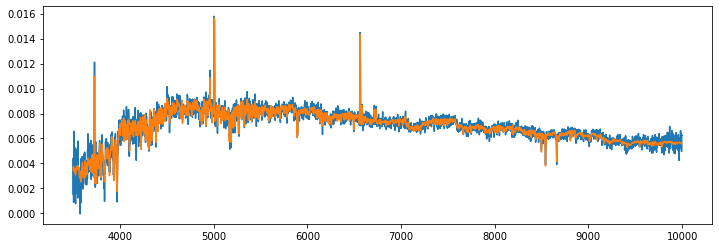

In [28]:
plt.figure(figsize=(12,4))
plt.plot(lista[:,0],lista[:,-1])
plt.plot(lista[:,0],lista[:,2])

## 10. 保存结果

In [21]:
# write file
namedat=np.array(['lambda','S/N','tar_flux','tot_noise','sc_noise', \
                  'sys_noise', 'readnoise','dark_noise', 'sky_noise', 'mockgal'])
unit=np.array(['A', ' ','1e-13 erg/s/cm2/A',\
               '#e','#e','#e','#e','#e','#e', '1e-13 erg/s/cm2/A'])

hdr=fits.Header()
for i in range(len(namedat)):
    hdr[str(i)]=unit[i]
hun1=fits.PrimaryHDU(header=hdr)
hun2=fits.BinTableHDU.from_columns([fits.Column(name=namedat[i],array=np.array(lista[:,i]),format='1E') for i in range(len(namedat))])
hdulist = fits.HDUList([hun1,hun2])
'''
if(os.path.exists('./noise_'+str(filtersel)+'_'+str(galtpl)+'.fits'))==1:
    os.remove('./noise_'+str(filtersel)+'_'+str(galtpl)+'.fits')
'''
filename='aaa.fits'
hdulist.writeto('./'+filename)